In [369]:
#Import relevant libraries for use within the program
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # Import train_test_split function from scikit learn
from sklearn import svm
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import ARDRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
import seaborn as sb
from sklearn.cluster import KMeans
from pygam import LogisticGAM
from sklearn import tree

df = pd.read_excel(open('sense_data.xlsx', 'rb'), sheet_name='Data format')

In [370]:
df.head(5)

,Site,Date,Plot #,Subplot,Unique_Plot_Name,Longitude,Latitude,Elevation,Tecticornia_height,Tecticornia_Width,...,Sueda_Width,Sueda_Length,Sueda_AGB g,Sueda_AGB (kg),Sueda_g Corg,No. Of tussock,No. Of Tecticornia,% Cover Sarco_AVG,% Cover Sueda_AVG,Tussock area
0,PVS,2022-03-24,1,A,PVS1A,144.676786,-38.202614,,,,...,53,43,1161.90785,1.161908,548.188124,0,0,57.5,38.75,NaN
1,PVS,2022-03-24,1,A,PVS1A,144.676786,-38.202614,NaN,NaN,NaN,...,41,37,773.28785,0.773288,364.837208,0,0,57.5,38.75,0.0
2,PVS,2022-03-24,1,A,PVS1A,144.676786,-38.202614,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,0,57.5,38.75,0.0
3,PVS,2022-03-24,1,A,PVS1A,144.676786,-38.202614,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,0,57.5,38.75,0.0
4,PVS,2022-03-24,1,A,PVS1A,144.676786,-38.202614,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,0,57.5,38.75,0.0


## Data Cleaning:
- Coerce non-numerics

In [371]:
df_numeric_cols = ['Longitude',
       'Latitude', 'Elevation', 'Tecticornia_height', 'Tecticornia_Width',
       'Tectocornia_Length', 'Tecticornia_AGB g', 'Tecticornia_AGB (kg)',
       'Tecticornia_g Corg', 'Tussock_height', 'Tussock_Width',
       'Tussock_Length', 'Sarcocornia_height', 'Sueda_height', 'Sueda_Width',
       'Sueda_Length', 'Sueda_AGB g', 'Sueda_AGB (kg)', 'Sueda_g Corg',
       'No. Of tussock', 'No. Of Tecticornia', '% Cover Sarco_AVG',
       '% Cover Sueda_AVG', 'Tussock area']
for col in df_numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    df[col] = df[col].interpolate()

In [372]:
df.describe()

,Plot #,Longitude,Latitude,Elevation,Tecticornia_height,Tecticornia_Width,Tectocornia_Length,Tecticornia_AGB g,Tecticornia_AGB (kg),Tecticornia_g Corg,...,Sueda_Width,Sueda_Length,Sueda_AGB g,Sueda_AGB (kg),Sueda_g Corg,No. Of tussock,No. Of Tecticornia,% Cover Sarco_AVG,% Cover Sueda_AVG,Tussock area
count,1130.000000,1130.000000,1130.000000,0.0,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,...,1130.000000,1130.000000,1130.000000,1130.000000,1130.000000,1130.000000,1130.000000,1130.000000,1130.000000,1129.000000
mean,13.637168,144.647267,-38.229287,NaN,55.557009,89.108411,85.999533,2738.888377,2.738888,1292.207536,...,24.272566,24.303186,552.898391,0.552898,260.857461,3.840708,1.061947,34.881822,2.514749,8728.507532
std,9.668612,0.023336,0.020228,NaN,24.168415,68.989489,69.642625,13065.327102,13.065327,6164.221327,...,18.437907,18.697138,697.043410,0.697043,328.865081,9.156223,2.487464,32.165971,8.851045,32566.879388
min,1.000000,144.618327,-38.254660,NaN,5.000000,5.000000,4.000000,0.009023,0.000009,0.004257,...,1.000000,1.000000,-0.382150,-0.000382,-0.180298,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,144.619490,-38.251991,NaN,33.386364,46.000000,39.000000,32.314112,0.032314,15.245798,...,9.327068,8.141183,47.291027,0.047291,22.311906,0.000000,0.000000,4.000000,0.000000,0.000000
50%,12.000000,144.650185,-38.228258,NaN,53.153959,65.004032,58.000000,138.673353,0.138673,65.426088,...,19.767187,18.171429,279.777850,0.279778,131.999190,0.000000,0.000000,29.000000,0.000000,0.000000
75%,18.000000,144.676783,-38.202543,NaN,72.466778,108.687500,105.250000,280.214771,0.280215,132.205329,...,36.848718,37.421429,935.215506,0.935216,441.234676,1.000000,1.000000,60.000000,0.000000,392.699082
max,40.000000,144.678438,-38.201762,NaN,140.000000,471.000000,460.000000,112080.563574,112.080564,52879.609894,...,141.000000,120.000000,5691.217850,5.691218,2685.116582,45.000000,17.000000,100.000000,73.750000,534070.751110


In [373]:
df.head(5)

,Site,Date,Plot #,Subplot,Unique_Plot_Name,Longitude,Latitude,Elevation,Tecticornia_height,Tecticornia_Width,...,Sueda_Width,Sueda_Length,Sueda_AGB g,Sueda_AGB (kg),Sueda_g Corg,No. Of tussock,No. Of Tecticornia,% Cover Sarco_AVG,% Cover Sueda_AVG,Tussock area
0,PVS,2022-03-24,1,A,PVS1A,144.676786,-38.202614,NaN,NaN,NaN,...,53.000000,43.000000,1161.907850,1.161908,548.188124,0,0,57.5,38.75,NaN
1,PVS,2022-03-24,1,A,PVS1A,144.676786,-38.202614,NaN,NaN,NaN,...,41.000000,37.000000,773.287850,0.773288,364.837208,0,0,57.5,38.75,0.0
2,PVS,2022-03-24,1,A,PVS1A,144.676786,-38.202614,NaN,NaN,NaN,...,38.714286,34.928571,720.648564,0.720649,340.001993,0,0,57.5,38.75,0.0
3,PVS,2022-03-24,1,A,PVS1A,144.676786,-38.202614,NaN,NaN,NaN,...,36.428571,32.857143,668.009279,0.668009,315.166778,0,0,57.5,38.75,0.0
4,PVS,2022-03-24,1,A,PVS1A,144.676786,-38.202614,NaN,NaN,NaN,...,34.142857,30.785714,615.369993,0.615370,290.331563,0,0,57.5,38.75,0.0


### Get satellite data

In [374]:
sdf = pd.read_csv(open('satellite_data.csv', 'rb'))

In [375]:
sdf.head(5)

,system:index,plot_id,lng,lat,B1,B10,B11,B12,B2,B3,...,B5,B6,B7,B8,B8A,B9,QA10,QA20,QA60,.geo
0,0,SR 1A,144.676354,-38.202535,3223.949890,1029.474614,2342.065342,1844.766667,3127.228035,2659.907947,...,2489.835099,2755.866004,2819.014790,2986.198234,2855.715453,1650.764018,0,0,0,"{""type"":""Polygon"",""coordinates"":[[[144.6501879..."
1,1,SR 2A,144.676410,-38.202542,3195.955629,1029.294702,2333.200662,1835.465784,3125.835541,2648.784989,...,2483.649007,2740.553642,2800.846358,2971.614570,2826.354084,1636.335099,0,0,0,"{""type"":""Polygon"",""coordinates"":[[[144.6502474..."
2,2,SR 1B,144.676410,-38.202543,3013.812057,1028.124113,2229.930186,1769.556294,3007.130984,2542.798537,...,2381.804743,2602.227172,2664.899823,2823.337988,2674.585106,1542.453901,0,0,0,"{""type"":""Polygon"",""coordinates"":[[[144.6504589..."
3,3,SR 2A,144.676557,-38.202566,2996.562749,1028.013257,2206.003977,1760.361467,2975.081087,2521.393946,...,2357.861025,2572.914494,2639.720062,2787.805789,2651.709898,1533.563190,0,0,0,"{""type"":""Polygon"",""coordinates"":[[[144.6505046..."
4,4,SR 2B,144.676611,-38.202568,2978.266681,1027.347768,2136.561202,1694.514361,2915.009501,2440.597879,...,2252.366107,2513.130800,2589.952055,2746.458241,2621.944101,1531.630358,0,0,0,"{""type"":""Polygon"",""coordinates"":[[[144.6500627..."


In [376]:
sdf.columns

Index(['system:index', 'plot_id', 'lng', 'lat', 'B1', 'B10', 'B11', 'B12',
       'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B9', 'QA10', 'QA20',
       'QA60', '.geo'],
      dtype='object')

In [377]:
sdf_numeric_cols = ['lng', 'lat', 'B1', 'B10', 'B11', 'B12','B2', 'B3', 'B4', 
                    'B5', 'B6', 'B7', 'B8', 'B8A', 'B9']

# Convert datatype and remove NaN's (if any)
for col in sdf_numeric_cols:
    sdf[col] = pd.to_numeric(sdf[col], errors='coerce')

In [378]:
# Normalise Bands:
cols_to_normalise = ['B1', 'B10', 'B11', 'B12', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B9']
for col in cols_to_normalise:
    sdf[col] = (sdf[col]-sdf[col].min())/(sdf[col].max()-sdf[col].min()) + 0.00001 # add offset to remove DIV 0 error

In [379]:
# Format Plot ID's
sdf['plot_id'] = [plot.replace(' ', '') for plot in sdf['plot_id']]

### Create indices

In [380]:
import json
import math 

In [381]:
def geoJSONToLngLats(geo_json):
    data = json.loads(geo_json)
    return [[point[0], point[1]] for point in data['coordinates']]

# sdf['poly'] = [geoJSONToLngLats(x) for x in sdf['.geo']]

In [382]:
B8 = sdf['B8'] # NIR
B4 = sdf['B4'] # RED
B2 = sdf['B2'] # BLUE
B3 = sdf['B3'] # GREEN

sdf['NDVI'] = [(NIR-RED)/(NIR+RED) for NIR, RED in zip(B8, B4)]
z_NDVI = (sdf['NDVI']-sdf['NDVI'].min())/(sdf['NDVI'].max()-sdf['NDVI'].min())
sdf['SAVI'] = [(NIR-RED)/(NIR+RED+0.5)*1.5 for NIR, RED in zip(B8, B4)]
sdf['OSAVI'] = [1.16*(NIR-RED)/(NIR+RED + 1.16) for NIR, RED in zip(B8, B4)]
sdf['MSAVI'] = [(2*NIR+1-math.sqrt(math.pow(2*NIR+1, 2)-8*(NIR-RED)))/2 for NIR, RED in zip(B8, B4)]
sdf['EVI'] = [2.5*((NIR-RED)/(NIR+6*RED-7.5*BLUE+1)) for NIR, RED, BLUE in zip(B8, B4, B2)]
sdf['RVI'] = [NIR/RED for NIR, RED in zip(B8, B4)]
sdf['RDVI'] = [(NIR-RED)/math.sqrt((NIR+RED)) for NIR, RED in zip(B8, B4)]
sdf['TVI'] = [math.sqrt(NDVI) + 0.5 for NDVI in z_NDVI]
sdf['DVI'] = [NIR-RED for NIR, RED in zip(B8, B4)]
sdf['GNDVI'] = [(NIR-GREEN)/(NIR+GREEN) for NIR, GREEN in zip(B8, B3)]

### Define Inputs and outputs

In [383]:
inputs =  ['B1', 'B10', 'B11', 'B12', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B9',
          'NDVI', 'SAVI', 'OSAVI', 'MSAVI', 'EVI', 'RVI', 'RDVI', 'TVI', 'DVI', 'GNDVI']

outputs = ['Tecticornia_height', 'Tecticornia_Width',
           'Tectocornia_Length', 'Tecticornia_AGB g', 'Tecticornia_AGB (kg)',
           'Tecticornia_g Corg', 'Tussock_height', 'Tussock_Width',
           'Tussock_Length', 'Sarcocornia_height', 'Sueda_height', 'Sueda_Width',
           'Sueda_Length', 'Sueda_AGB g', 'Sueda_AGB (kg)', 'Sueda_g Corg',
           'No. Of tussock', 'No. Of Tecticornia', '% Cover Sarco_AVG',
           '% Cover Sueda_AVG', 'Tussock area']

### Associate Location Data

In [384]:
df = pd.merge(df, sdf, left_on='Unique_Plot_Name', right_on='plot_id')

In [385]:
df.columns

Index(['Site', 'Date', 'Plot #', 'Subplot', 'Unique_Plot_Name', 'Longitude',
       'Latitude', 'Elevation', 'Tecticornia_height', 'Tecticornia_Width',
       'Tectocornia_Length', 'Tecticornia_AGB g', 'Tecticornia_AGB (kg)',
       'Tecticornia_g Corg', 'Tussock_height', 'Tussock_Width',
       'Tussock_Length', 'Sarcocornia_height', 'Sueda_height', 'Sueda_Width',
       'Sueda_Length', 'Sueda_AGB g', 'Sueda_AGB (kg)', 'Sueda_g Corg',
       'No. Of tussock', 'No. Of Tecticornia', '% Cover Sarco_AVG',
       '% Cover Sueda_AVG', 'Tussock area', 'system:index', 'plot_id', 'lng',
       'lat', 'B1', 'B10', 'B11', 'B12', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7',
       'B8', 'B8A', 'B9', 'QA10', 'QA20', 'QA60', '.geo', 'NDVI', 'SAVI',
       'OSAVI', 'MSAVI', 'EVI', 'RVI', 'RDVI', 'TVI', 'DVI', 'GNDVI'],
      dtype='object')

# Exploratory Analysis

In [386]:
df.describe()

,Plot #,Longitude,Latitude,Elevation,Tecticornia_height,Tecticornia_Width,Tectocornia_Length,Tecticornia_AGB g,Tecticornia_AGB (kg),Tecticornia_g Corg,...,NDVI,SAVI,OSAVI,MSAVI,EVI,RVI,RDVI,TVI,DVI,GNDVI
count,1135.000000,1135.000000,1135.000000,0.0,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,...,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000
mean,13.585903,144.647286,-38.229278,NaN,55.334049,88.666821,85.576557,2713.747800,2.713748,1280.346212,...,0.257419,0.078890,0.032643,0.065142,0.421259,2.563348,0.093395,1.292184,0.043434,0.211979
std,9.678034,0.023285,0.020184,NaN,24.166628,68.822413,69.457387,13007.244840,13.007245,6136.818116,...,0.269726,0.079576,0.037945,0.073055,2.259901,4.576148,0.088322,0.096736,0.066407,0.268043
min,1.000000,144.618327,-38.254660,NaN,5.000000,5.000000,4.000000,0.009023,0.000009,0.004257,...,-0.991372,-0.100956,-0.055610,-0.103386,-0.678366,0.004333,-0.103271,0.500000,-0.109969,-0.989784
25%,6.000000,144.619490,-38.251991,NaN,33.000000,46.000000,39.000000,28.874936,0.028875,13.623195,...,0.078677,0.026759,0.009243,0.018568,0.028047,1.170791,0.037131,1.238745,0.009504,0.064194
50%,12.000000,144.650188,-38.228243,NaN,52.719697,64.560484,57.524242,136.403533,0.136404,64.355187,...,0.220401,0.093914,0.037721,0.076984,0.113678,1.565421,0.112978,1.286146,0.044776,0.141922
75%,18.000000,144.676726,-38.202543,NaN,72.273094,107.769231,104.038462,275.179543,0.275180,129.829708,...,0.421569,0.133133,0.055097,0.109873,0.195481,2.457630,0.151897,1.348896,0.069978,0.350413
max,40.000000,144.678438,-38.201762,NaN,140.000000,471.000000,460.000000,112080.563574,112.080564,52879.609894,...,0.969345,0.279928,0.137670,0.269123,30.366255,64.242260,0.266272,1.500000,0.216277,0.969345


<AxesSubplot:>

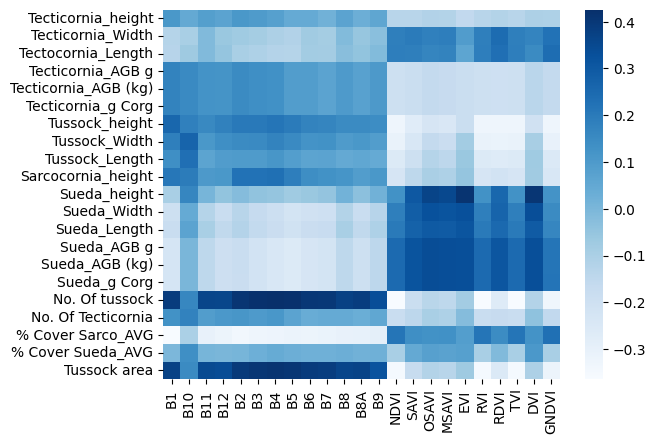

In [387]:
corr = df.corr(method='spearman')

corr = corr.drop(inputs, axis=1)
corr = corr.drop(['Plot #', 'system:index', 'lat', 'QA10', 'QA60', 'lng', 'QA20', 'Longitude', 'Elevation', 'Latitude'], axis=1)

corr = corr.drop(outputs, axis=0)
corr = corr.drop(['lat', 'system:index', 'Plot #', 'QA10', 'QA60', 'lng', 'QA20', 'Elevation', 'Longitude', 'Latitude'], axis=0)

sb.heatmap(corr.T, cmap="Blues", annot=False)

# Machine Learning Analysis

### SVR

In [407]:
def analyse_svr(regr, input_df, target_df, name):
    na_rows = target_df.isna()
    # Get the latent variable (y value) from the dataframe. Also remove NaN rows if any
    y = target_df[~na_rows].values.copy()
    
    # Get the inputs (x values) from the dataframe
    x = input_df[~na_rows].values.copy()

    # Split data for supervised learning
    X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 0)
    
    # Train the algorithm on training data-
    regr.fit(X_train, y_train)
    y_pred = regr.predict(X_test)
    
    score = cross_val_score(estimator = regr, X = X_train, y = y_train, cv = 10, scoring='neg_mean_squared_error')
    
    scores_df = pd.DataFrame()
    
    scores_df['name'] = [name]
    scores_df['score_mean'] = [score.mean()]
    scores_df['score_std'] = [score.std()]
    scores_df['Training_score'] = [regr.score(X_train, y_train)]
    scores_df['Testing_score'] = [regr.score(X_test, y_test)]
    scores_df['r2_score'] = [r2_score(y_test , y_pred)]
#     scores_df['accuracy'] = [regr.accuracy(X, y)]
    
    return scores_df

In [408]:
scores_svr = pd.DataFrame()


for output in outputs:
    # Initialise the model
#     regr = svm.SVR(kernel='poly', degree=5)
    regr = svm.SVR(kernel='poly', degree=5)
#     scores.concat(, ignore_index=True)
    score = analyse_svr(regr, df[inputs], df[output], output)
    scores_svr = pd.concat([scores_svr, score], ignore_index=True)

,score_mean,score_std,Training_score,Testing_score,r2_score
name,,,,,
Tecticornia_height,-6.019259e+02,9.147427e+01,-0.001283,0.007195,0.007195
Tecticornia_Width,-5.735734e+03,2.140462e+03,-0.127086,-0.047841,-0.047841
Tectocornia_Length,-5.958285e+03,2.132551e+03,-0.162293,-0.086607,-0.086607
Tecticornia_AGB g,-1.894223e+08,1.676981e+08,-0.040058,-0.036226,-0.036226
Tecticornia_AGB (kg),-1.894303e+02,1.677124e+02,-0.040057,-0.036225,-0.036225
Tecticornia_g Corg,-4.216375e+07,3.732814e+07,-0.040035,-0.036203,-0.036203
Tussock_height,-5.315385e+02,8.372056e+01,-0.001115,-0.013400,-0.013400
Tussock_Width,-5.923238e+02,2.993682e+02,0.015141,0.000584,0.000584
Tussock_Length,-4.415675e+02,1.437127e+02,0.027915,0.018034,0.018034


<AxesSubplot:ylabel='name'>

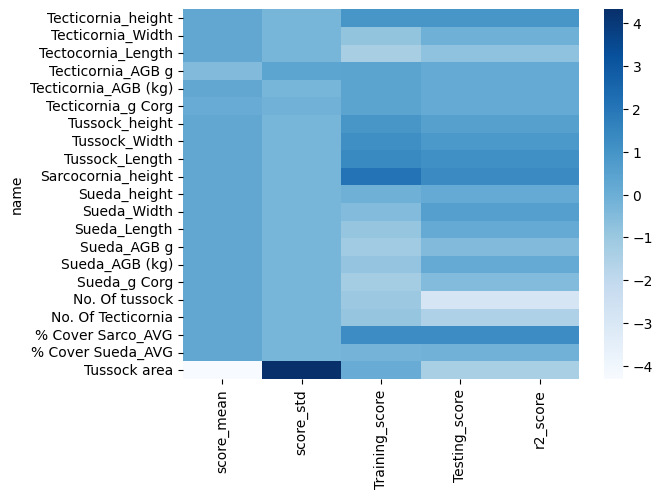

In [409]:
scores_svr.set_index('name', drop=True, inplace=True)
normalized_scores = (scores_svr-scores_svr.mean())/scores_svr.std()
display(scores_svr)
sb.heatmap(normalized_scores, cmap="Blues", annot=False)

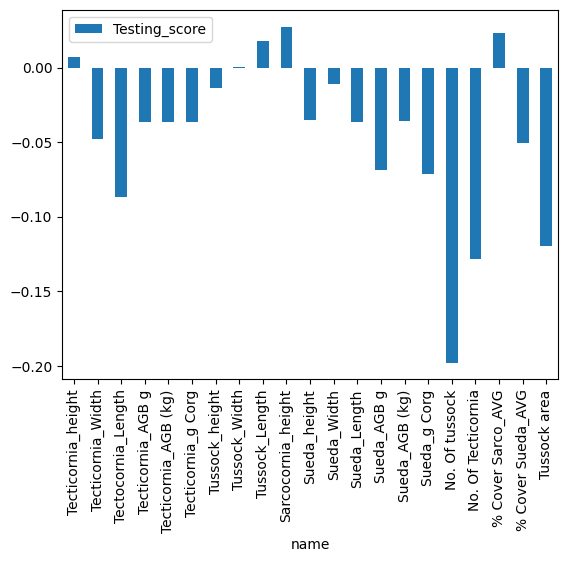

In [412]:
plot_svr_acc = scores_svr.plot.bar(y='Testing_score', rot=0)
for item in plot_svr_acc.get_xticklabels():
    item.set_rotation(90)

### Automatic Relevance Determination (Naive Bayes ++)

In [392]:
def analyse_ard(model, input_df, target_df, name):
    na_rows = target_df.isna()
    # Get the latent variable (y value) from the dataframe. Also remove NaN rows if any
    y = target_df[~na_rows].values.copy()
    
    # Get the inputs (x values) from the dataframe
    x = input_df[~na_rows].values.copy()

    # Split data for supervised learning
    X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 0)
    
    # Train the algorithm on training data-
    model.fit(X_train, y_train)
    y_pred = regr.predict(X_test)
    
    score = cross_val_score(estimator = regr, X = X_train, y = y_train, cv = 10, scoring='neg_mean_squared_error')
    
    scores_df = pd.DataFrame()
    
    scores_df['name'] = [name]
    scores_df['accuracy'] = [model.score(X_test, y_test)]
    
    return scores_df

In [393]:
scores_ard = pd.DataFrame()

for output in outputs:
    model = ARDRegression(compute_score=True, n_iter=30)
    score = analyse_ard(model, df[inputs], df[output], output)
    scores_ard = pd.concat([scores_ard, score], ignore_index=True)
scores_ard.set_index('name', drop=True, inplace=True)

In [394]:
scores_ard

,accuracy
name,
Tecticornia_height,0.166380
Tecticornia_Width,0.188553
Tectocornia_Length,0.277455
Tecticornia_AGB g,0.324201
Tecticornia_AGB (kg),0.346157
Tecticornia_g Corg,0.322895
Tussock_height,0.082898
Tussock_Width,0.078220
Tussock_Length,0.188840


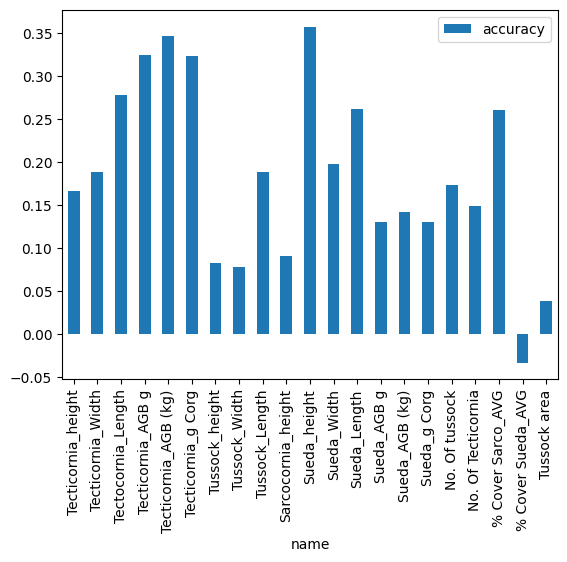

In [395]:
plot_ard = scores_ard.plot.bar(y='accuracy', rot=0)
for item in plot_ard.get_xticklabels():
    item.set_rotation(90)

### GAM

In [396]:
def analyse_gam(input_df, target_df, name):
    na_rows = target_df.isna()
    # Get the latent variable (y value) from the dataframe. Also remove NaN rows if any
    y = target_df[~na_rows].values.copy()
    y = (y-y.min())/(y.max()-y.min())
    
    # Get the inputs (x values) from the dataframe
    X = input_df[~na_rows].values.copy()
    
    X = (X-X.min())/(X.max()-X.min())
    
    # Train the algorithm on training data-
    gam = LogisticGAM().fit(X, y)
    
    scores_df = pd.DataFrame()
    
    scores_df['name'] = [name]
#     scores_df['summary'] = [gam.summary()]
    scores_df['accuracy'] = [gam.accuracy(X, y)]
    
    return scores_df

In [397]:
scores_gam = pd.DataFrame()

for output in outputs:
    # Initialise the model
    score = analyse_gam(df[inputs], df[output], output)
    scores_gam = pd.concat([scores_gam, score], ignore_index=True)

/opt/conda/lib/python3.10/site-packages/pygam/pygam.py:1112: RuntimeWarning: invalid value encountered in double_scalars
  r2['McFadden'] = full_ll/null_ll
/opt/conda/lib/python3.10/site-packages/pygam/pygam.py:1113: RuntimeWarning: invalid value encountered in double_scalars
  r2['McFadden_adj'] = 1. - (full_ll - self.statistics_['edof'])/null_ll
/opt/conda/lib/python3.10/site-packages/pygam/pygam.py:1112: RuntimeWarning: invalid value encountered in double_scalars
  r2['McFadden'] = full_ll/null_ll
/opt/conda/lib/python3.10/site-packages/pygam/pygam.py:1113: RuntimeWarning: invalid value encountered in double_scalars
  r2['McFadden_adj'] = 1. - (full_ll - self.statistics_['edof'])/null_ll
/opt/conda/lib/python3.10/site-packages/pygam/pygam.py:1112: RuntimeWarning: invalid value encountered in double_scalars
  r2['McFadden'] = full_ll/null_ll
/opt/conda/lib/python3.10/site-packages/pygam/pygam.py:1113: RuntimeWarning: invalid value encountered in double_scalars
  r2['McFadden_adj'] = 

In [398]:
scores_gam

,name,accuracy
0,Tecticornia_height,0.002778
1,Tecticornia_Width,0.000926
2,Tectocornia_Length,0.001852
3,Tecticornia_AGB g,0.000926
4,Tecticornia_AGB (kg),0.000926
5,Tecticornia_g Corg,0.000926
6,Tussock_height,0.002000
7,Tussock_Width,0.001000
8,Tussock_Length,0.003000
9,Sarcocornia_height,0.004405


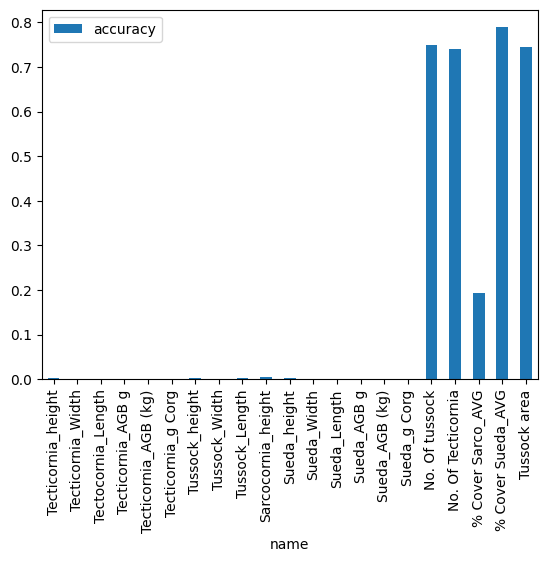

In [399]:
plot_gam_acc = scores_gam.plot.bar(x='name', y='accuracy', rot=0)
for item in plot_gam_acc.get_xticklabels():
    item.set_rotation(90)

### Gradient boosting

In [400]:
def analyse_gradient_boosting(model, input_df, target_df, name):
    na_rows = target_df.isna()
    # Get the latent variable (y value) from the dataframe. Also remove NaN rows if any
    y = target_df[~na_rows].values.copy()
    
    # Get the inputs (x values) from the dataframe
    x = input_df[~na_rows].values.copy()

    # Split data for supervised learning
    X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 0)
    
    # Train the algorithm on training data-
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    scores_df = pd.DataFrame()
    
    scores_df['name'] = [name]
    scores_df['accuracy'] = [model.score(X_test, y_test)]
    
    return scores_df

In [401]:
scores_gradient_boosting = pd.DataFrame()

for output in outputs:
    # Initialise the model
    model = GradientBoostingRegressor(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)

    score = analyse_gradient_boosting(model, df[inputs], df[output], output)
    scores_gradient_boosting = pd.concat([scores_gradient_boosting, score], ignore_index=True)

In [402]:
normalized_scores_GB = scores_gradient_boosting.set_index('name', drop=True)
normalized_scores_GB = (scores_gradient_boosting-scores_gradient_boosting.mean())/scores_gradient_boosting.std()
scores_gradient_boosting

/tmp/ipykernel_67/1464081116.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  normalized_scores_GB = (scores_gradient_boosting-scores_gradient_boosting.mean())/scores_gradient_boosting.std()


,name,accuracy
0,Tecticornia_height,0.741015
1,Tecticornia_Width,0.831406
2,Tectocornia_Length,0.794693
3,Tecticornia_AGB g,0.975372
4,Tecticornia_AGB (kg),0.975372
5,Tecticornia_g Corg,0.975372
6,Tussock_height,0.499076
7,Tussock_Width,0.520014
8,Tussock_Length,0.519376
9,Sarcocornia_height,0.337099


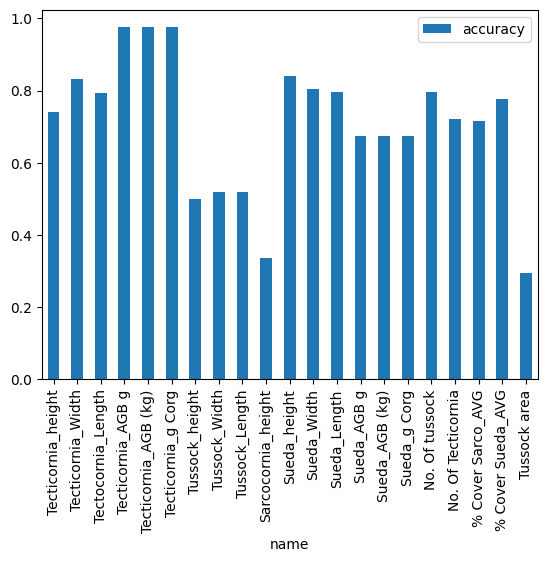

In [403]:
plot_gradient_boosting = scores_gradient_boosting.plot.bar(x='name', y='accuracy', rot=0)
for item in plot_gradient_boosting.get_xticklabels():
    item.set_rotation(90)

### Decision Tree Regressor

In [413]:
def analyse_decision_tree(model, input_df, target_df, name):
    na_rows = target_df.isna()
    # Get the latent variable (y value) from the dataframe. Also remove NaN rows if any
    y = target_df[~na_rows].values.copy()
    
    # Get the inputs (x values) from the dataframe
    x = input_df[~na_rows].values.copy()

    # Split data for supervised learning
    X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 0, test_size=0.5)
    
    # Train the algorithm on training data-
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    scores_df = pd.DataFrame()
    
    scores_df['name'] = [name]
    scores_df['accuracy'] = [accuracy_score(y_test, y_pred, normalize=False)]
    
    return scores_df

In [414]:
scores_decision_tree = pd.DataFrame()

for output in outputs:
    # Initialise the model
    model = tree.DecisionTreeRegressor()

    score = analyse_decision_tree(model, df[inputs], df[output], output)
    scores_decision_tree = pd.concat([scores_decision_tree, score], ignore_index=True)

ValueError: continuous is not supported

In [415]:
normalized_scores_DT = scores_decision_tree.set_index('name', drop=True)
normalized_scores_DT = (scores_decision_tree-scores_decision_tree.mean())/scores_decision_tree.std()
scores_decision_tree

KeyError: "None of ['name'] are in the columns"

In [416]:
plot_decisionTree = scores_decision_tree.plot.bar(x='name', y='accuracy', rot=0)
for item in plot_decisionTree.get_xticklabels():
    item.set_rotation(90)

KeyError: 'name'